In [13]:
import tensorflow as tf

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import zipfile
# import wget
# url='https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
# wget.download(url)



In [ ]:
# zip_ref=zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [1]:
import os
for dirpath,dirname,filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data\test'
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'
There are 10 directori

In [4]:
train_dir='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [5]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [6]:
import matplotlib.image as mpimg
import random

In [7]:
def view_random_images(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    img=mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img


['931356.jpg']
Image shape: (512, 512, 3)


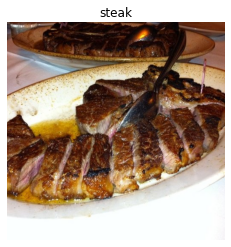

In [29]:
img=view_random_images(target_dir=train_dir+"/",target_class=random.choice(class_names))

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                            batch_size=32,class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                           batch_size=32,class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [38]:
model_1=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [36]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [39]:
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=(len(train_data)),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 71s 302ms/step - loss: 2.1300 - accuracy: 0.2159 - val_loss: 1.9653 - val_accuracy: 0.3076
Epoch 2/5
235/235 [==============================] - 22s 95ms/step - loss: 1.8353 - accuracy: 0.3637 - val_loss: 1.8823 - val_accuracy: 0.3368
Epoch 3/5
235/235 [==============================] - 22s 96ms/step - loss: 1.4383 - accuracy: 0.5189 - val_loss: 1.9663 - val_accuracy: 0.3244
Epoch 4/5
235/235 [==============================] - 23s 97ms/step - loss: 0.8834 - accuracy: 0.7159 - val_loss: 2.5296 - val_accuracy: 0.2860
Epoch 5/5
235/235 [==============================] - 23s 97ms/step - loss: 0.3727 - accuracy: 0.8839 - val_loss: 3.4404 - val_accuracy: 0.2612


In [40]:
def plot_loss_curves(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    accuracy=history.history["accuracy"]
    val_accuracy=history.history["val_accuracy"]

    epochs=range(len(history.history['loss']))

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    

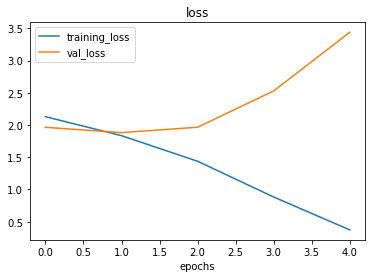

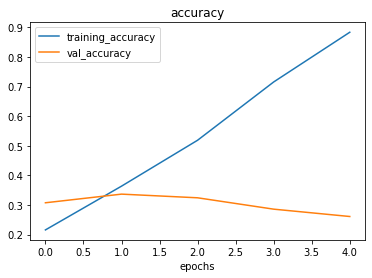

In [41]:
plot_loss_curves(history_1)

***Model is overfitting, getting great results on training data but failing to generalize to unseen data and poorly performing.*** 